# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

If we are going to predict mpg in LR, weight would be the most unlikely choice of independent variable because the heatmap shows they have the smallest correlation value (-0.83).


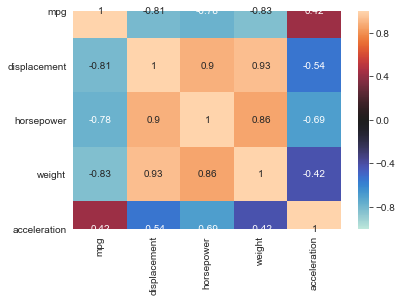

In [126]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cars = pd.read_csv("auto-mpg.csv")

# Drop origin column from data frame
cars_without_origin = cars.drop("origin", axis = 1, inplace = False)

sns.heatmap(cars_without_origin.corr(), annot = True, vmin = -1, vmax = 1, center = 0)

answer = "If we are going to predict mpg in LR, weight would be the most unlikely choice of independent variable "
answer += "because the heatmap shows they have the smallest correlation value (-0.83)."
print(answer)

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

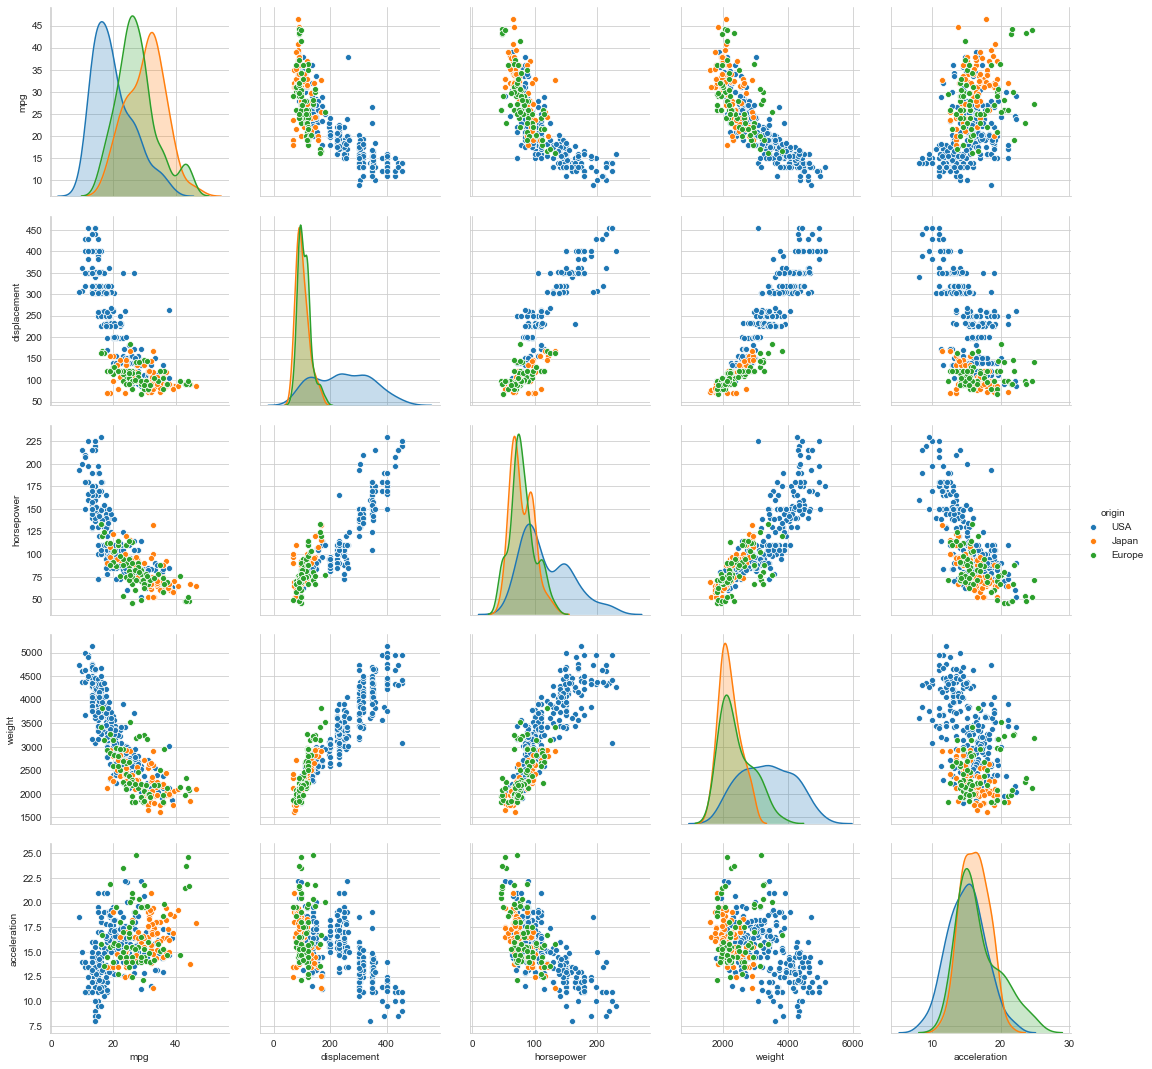

If we are using horsepower to predict mpg, Polynomial Regression would be the best choice because mpg v.s. horsepower graph shows
a polynomial shape no matter which country the car is manufactured.


In [113]:
sns.set_style("whitegrid")
sns.pairplot(cars, hue="origin", height=3)
plt.show()

answer = "If we are using horsepower to predict mpg, Polynomial Regression would be the best choice because mpg v.s. horsepower graph shows\n"
answer += "a polynomial shape no matter which country the car is manufactured."
print(answer)

## Exercise 2 - Linear and Polynomial Regression (30 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [114]:
size = cars.shape[0]
testing_size = int(size * 0.2) + 1
training_set = cars[:-testing_size]
testing_set = cars[-testing_size:]

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

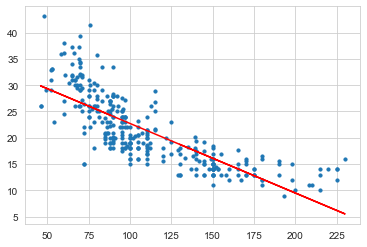

Training MSE: 16.76226455154498
Test MSE: 65.75487610890765


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import operator

model = LinearRegression()

x = cars["horsepower"]
y = cars["mpg"]
x = x[:, np.newaxis]
y = y[:, np.newaxis]

x_train = training_set["horsepower"]
y_train = training_set["mpg"]
x_test = testing_set["horsepower"]
y_test = testing_set["mpg"]

# Increase data dimension
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

# Feed training set to model
model.fit(x_train, y_train)

# Get prediction
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Plot linear regression graph for training set
plt.scatter(x_train, y_train, s = 10)
plt.plot(x_train, y_train_pred, color = 'r')
plt.show()

# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

### Exercise 2.3 - Polynomial Regression (15 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


Degree: 2
Training MSE: 13.00749860252935
Test MSE: 53.24002997317977


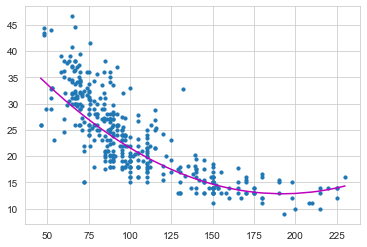

Degree: 3
Training MSE: 12.990554618171583
Test MSE: 53.042133145361085


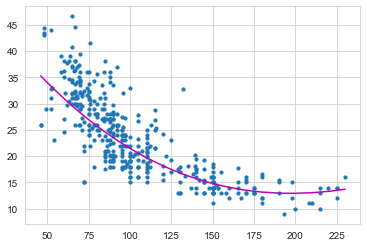

Degree: 4
Training MSE: 12.920961660087755
Test MSE: 52.84152191711347


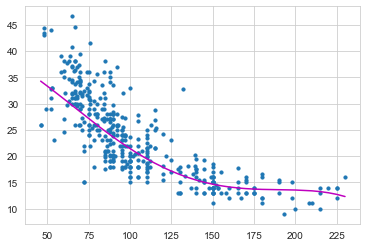

In [116]:
from sklearn.preprocessing import PolynomialFeatures

for i in range(2,5):
    pf = PolynomialFeatures(degree = i)
    x_poly_train = pf.fit_transform(x_train)
    x_poly_test = pf.fit_transform(x_test)

    model.fit(x_poly_train, y_train)

    print("Degree:", i)
    
    y_train_pred = model.predict(x_poly_train)
    y_test_pred = model.predict(x_poly_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print("Training MSE:", train_mse)
    print("Test MSE:", test_mse)

    plt.scatter(x, y, s = 10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_train_pred), key=sort_axis)
    x_poly_train, y_train_pred = zip(*sorted_zip)
    plt.plot(x_poly_train, y_train_pred, color ='m')
    plt.show()

answer = "I don't think the model is overfitting because training MSE and test MSE are both decreasing as we increment the degree of polynomial"

## Exercise 3 - Overfitting and Underfitting (25 points in total)
The fitting dataset contains the actual train and test data spread for a model along with three rotations of the same. The dataset is provided in the Canvas file.

### Exercise 3.1 - sse and variance
Calculate the sse and variance for the three predictions based on the actual data.<br >
Show the calculation for the above metrics.<br >
Highlight the values you get for all three predictions and the actual data. 

In [117]:
df = pd.read_csv("fitting.csv")

# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# display(df)

# Extract training data
training_set= df.iloc[:, 0:4].to_numpy()
training_value = training_set[:, 0]

# Extract testing data
testing_set = df.iloc[:5, 4:].to_numpy()
testing_value = testing_set[:, 0]

# Calculate sse for training and test dataset for each prediction
sse_train = [0,0,0]
sse_test = [0,0,0]

for i in range(0,3):
    prediction_train = training_set[:, i + 1]
    prediction_test = testing_set[:, i + 1]

    for j, v in enumerate(prediction_train):
        sse_train[i] += (v - training_value[j]) ** 2

    for j, v in enumerate(prediction_test):
        sse_test[i] += (v - testing_value[j]) ** 2
    
    print("Prediction {} training sse: {}".format(i + 1, sse_train[i]))
    print("Prediction {} test sse: {}\n".format(i + 1, sse_test[i]))


Prediction 1 training sse: 12.293500000000002
Prediction 1 test sse: 6.3418

Prediction 2 training sse: 12.3363
Prediction 2 test sse: 2.1254

Prediction 3 training sse: 19.173499999999997
Prediction 3 test sse: 13.425899999999999



### Excercise 3.2 - Justification
Based on the values calculated above classify the predictions into three categories base prediction, overfitting prediction, underfitting prediction. Also provide appropriate justifications for the classifications. 

In [118]:
# Comparatively, prediction one has low bias and high variance among the three predictions, thus I believe prediction 1 is overfitting. Next, prediction 2 has both relatively low bias and very low variance,
# thus it is mostly likely to be the ideal prediction. Lastly, prediction has the highest bias and variance, thus it is considered the underfitting prediction in my opinion.

## Exercise 4 - Outliers (25 points in total)
Now we are going to perform outlier detection using the diabetes dataset. 
The dataset is provided in the Canvas file.

### Exercise 4.1 - box plot
Extract the 'BloodPressure' attribute from the diabetes dataset.<br >
Create a box plot with the s1 serum attribute.<br >
Highlight the outliers in the box plot with special colors.

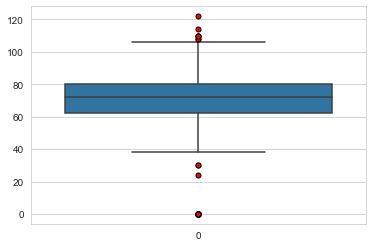

In [119]:
diabetes = pd.read_csv("diabetes.csv")
bp = diabetes["BloodPressure"]

sns.boxplot(data = bp, flierprops = {"marker": 'o', "markerfacecolor": "red", "markeredgecolor": "black"})

### Exercise 4.2 - anomaly detection
Extract features 'BMI' and 'Insulin' from the diabetes dataset.<br >
Implement anomaly detection using the One-Class SVM algorithm.<br >
Plot a scatter plot similar to Lecture 2 Slide 11, annotating the outlier data points.

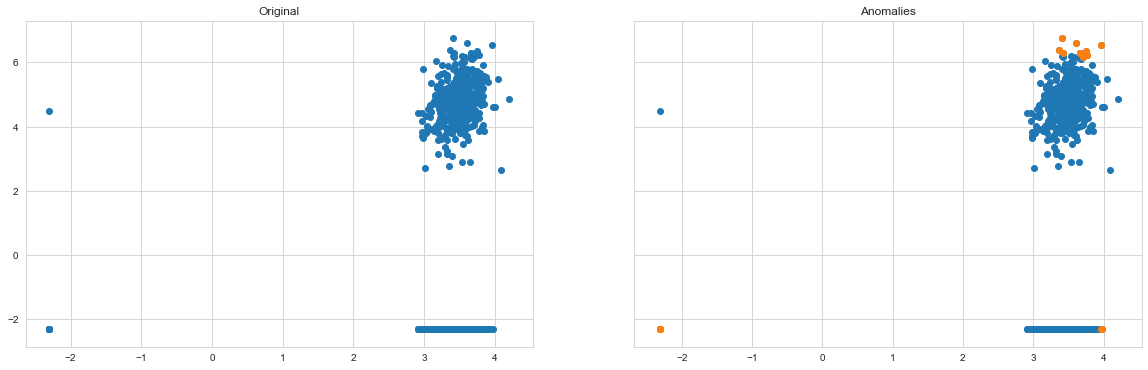

In [120]:
from sklearn.svm import OneClassSVM

# Extract bmi and insulin column, and normalize them
bmi = np.log((diabetes["BMI"] + 0.1).astype(float))
insulin = np.log((diabetes["Insulin"] + 0.1).astype(float))

# Converting dataframe to a 2d array
data = pd.concat([bmi, insulin], axis=1)
data_array = data.to_numpy()

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)

# Fit the model and make prediction
svm.fit(data)
pred = svm.predict(data)

# Extract negative outputs as outliers
anom_index = np.where(pred == -1)
values = data_array[anom_index]

# Plot the graph and distinguish outliers with different color
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))

# Original data
ax0.set_title('Original')
ax0.scatter(data["BMI"], data["Insulin"], cmap='rainbow')

# Highlight outliers
ax1.set_title('Anomalies')
ax1.scatter(data_array[:,0], data_array[:,1])
ax1.scatter(values[:,0], values[:,1], cmap='rainbow')
plt.show()